
Frequency Domain Analysis: Discusses the frequency response of linear time-invariant (LTI) continuous-time systems, focusing on circuits containing resistors, capacitors, and inductors.
RC Circuit Analysis: Explains the derivation of the frequency response for an RC circuit and introduces the concept of impedance.
Second Order Low Pass Filters: Details the Sallen-Key circuit, its frequency response, and the parameters ζ (damping factor) and ωn (natural frequency).
Bode Plots: Introduces Bode plots for visualizing frequency response and provides a MATLAB code snippet for creating Bode plots.
Filtering in MATLAB: Explains how to use MATLAB to simulate filtering of continuous-time signals using the lsim function.
Bode Plots: plotting Bode plots for different filters and analyzing their characteristics.
Filtering Speech: Guides students through a practical exercise where they filter an audio file using a second-order low-pass filter, add noise, and evaluate the filter's performance.

1. Plotting Bode Plots

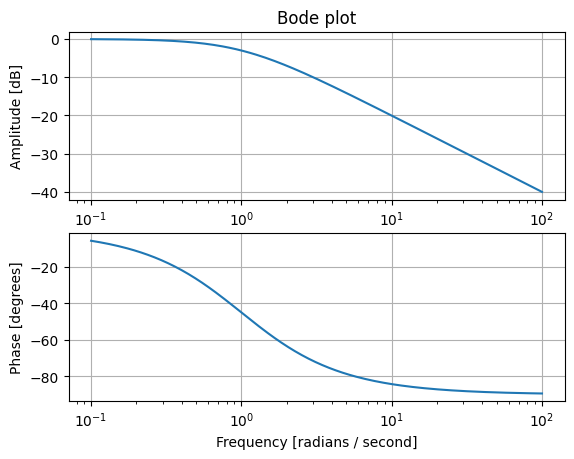

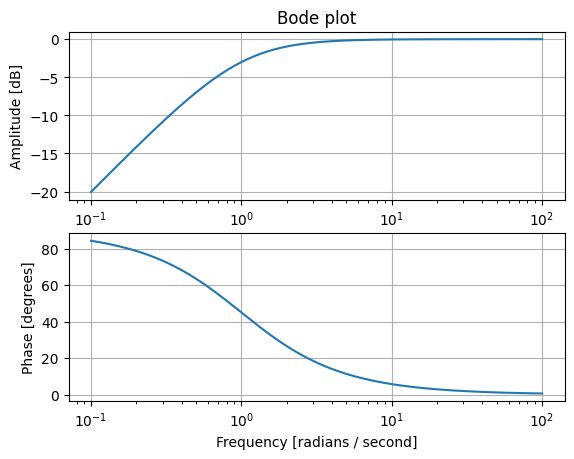

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

def bode_plot(h, w):
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.semilogx(w, 20 * np.log10(abs(h)))
    plt.title('Bode plot')
    plt.xlabel('Frequency [radians / second]')
    plt.ylabel('Amplitude [dB]')
    plt.grid()

    plt.subplot(2, 1, 2)
    plt.semilogx(w, np.angle(h, deg=True))
    plt.xlabel('Frequency [radians / second]')
    plt.ylabel('Phase [degrees]')
    plt.grid()
    plt.show()

# Define frequency range
w = np.logspace(-1, 2, 200)

# Low-pass filter with cutoff frequency B = 1 rad/sec
h_lp = 1 / (1 + 1j * w)
bode_plot(h_lp, w)

# High-pass filter with cutoff frequency B = 1 rad/sec
h_hp = 1j * w / (1 + 1j * w)
bode_plot(h_hp, w)


In [3]:
import numpy as np
from scipy.io.wavfile import write

# Parameters
sample_rate = 44100  # Sampling frequency
duration = 5  # Duration in seconds
frequency = 440  # Frequency of the sine wave (A4 note)

# Generate the time axis
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# Generate a sine wave
amplitude = np.iinfo(np.int16).max
data = amplitude * np.sin(2 * np.pi * frequency * t)

# Save as .wav file
write('whkight.wav', sample_rate, data.astype(np.int16))


2. Filtering Speech

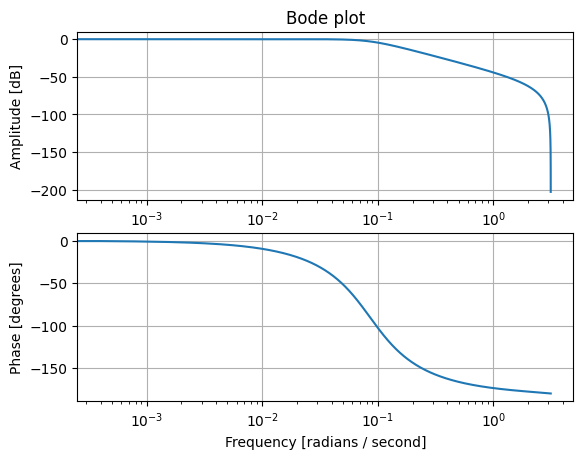

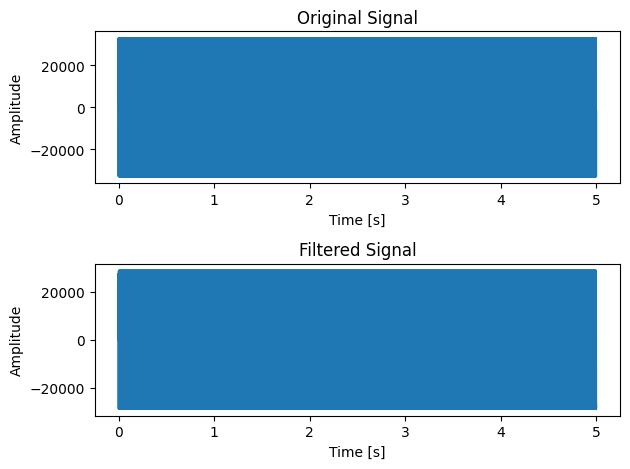

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy.io import wavfile
from scipy.signal import lfilter, butter, freqz

def bode_plot(h, w):
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.semilogx(w, 20 * np.log10(abs(h)))
    plt.title('Bode plot')
    plt.xlabel('Frequency [radians / second]')
    plt.ylabel('Amplitude [dB]')
    plt.grid()

    plt.subplot(2, 1, 2)
    plt.semilogx(w, np.angle(h, deg=True))
    plt.xlabel('Frequency [radians / second]')
    plt.ylabel('Phase [degrees]')
    plt.grid()
    plt.show()

def spchfilt():
    # Parameters for low-pass filter
    wn = 600 / (0.5 * 44100)  # Normalized frequency for digital filter
    zeta = 1 / np.sqrt(2)  # No resonance
    b, a = butter(2, wn, btype='low')

    # Plot Bode plot
    w, h = freqz(b, a, worN=8000)
    bode_plot(h, w)
    
    # Read audio file
    fs, data = wavfile.read('whkight.wav')
    t = np.arange(len(data)) / fs
    
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(t, data)
    plt.title('Original Signal')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    
    # Play original sound
    sd.play(data, fs)
    sd.wait()
    
    # Filter signal
    filtered_data = lfilter(b, a, data)
    
    plt.subplot(2, 1, 2)
    plt.plot(t, filtered_data)
    plt.title('Filtered Signal')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    
    plt.tight_layout()
    plt.show()
    
    # Play filtered sound
    sd.play(filtered_data, fs)
    sd.wait()

# Run the speech filter function
spchfilt()


### Important Points

#### Frequency Response: 
The frequency response of a circuit indicates how the circuit responds to different frequencies of input signals.

#### Bode Plots: 
Useful for visualizing the gain and phase shift of a system across a range of frequencies.

#### Sallen-Key Circuit: 
A second-order low-pass filter characterized by parameters ζ and ωn, important for controlling the filter's behavior.

#### MATLAB Simulation: 
The lsim function is used for simulating the response of continuous-time systems to arbitrary inputs.

#### Practical Filtering: 
The lab involves filtering an audio signal to remove high-frequency noise, demonstrating real-world applications of low-pass filters.

